#### Finding the optimal number of neighbors for K-Nearest Neighbors

In [1]:
# -*- coding: utf-8 -*-

import random
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import pickle
import gc
from sklearn.neighbors import KNeighborsClassifier

random.seed(22)

## set the directory
os.chdir(r'C:\Users\User\Documents\Data_Science_Projects\santander-customer-prediction')

# load the cleanData
data = pd.read_csv(r'.\data\trainFinal.csv')
testdata = pd.read_csv(r'.\data\testFinal.csv')


In [2]:
features = pd.read_csv(r'.\data\features.csv')
feature_imp = features[features['0']>0]
feature_selected = np.array(feature_imp['1'])
testdata = testdata[feature_selected]

feature_selected = np.append(feature_selected, 'target')
data = data[feature_selected]


In [3]:
def preprocess_data(data):
    data = data.rename(columns={'target': 'labels'})

    # separate the labels/target variable
    dataX = data.drop(['labels'], axis = 1)
    dataY = data['labels']
    
    # Create train and test dataset
    X_train, x_test, Y_train, y_test = train_test_split(dataX, dataY, test_size = 0.3, random_state = 0)
    
    # First, scale the Data - only those numerical/non-categorical
    return X_train, x_test, Y_train, y_test

X_train, x_test, Y_train, y_test = preprocess_data(data)

In [4]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))



NameError: name 'plt' is not defined

Text(0, 0.5, 'Mean Error')

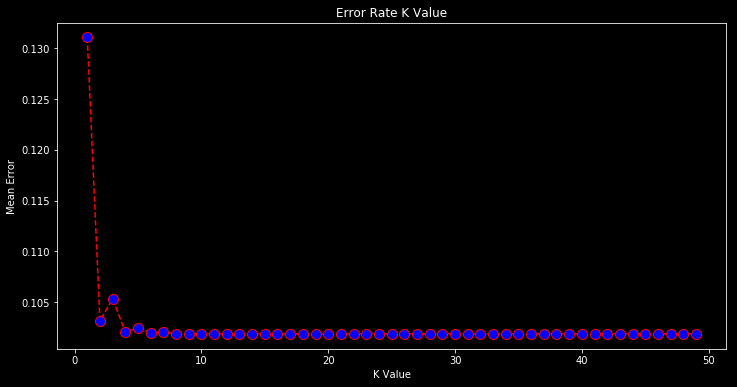

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

Text(0, 0.5, 'Mean Error')

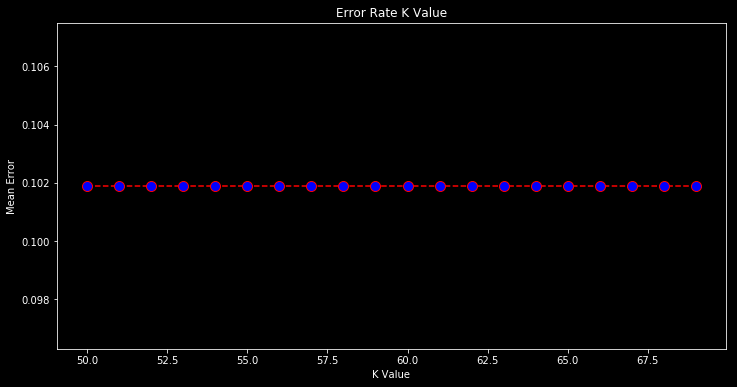

In [13]:
error2 = []
# Calculating error for K values between 1 and 40
for i in range(50, 70):  
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(x_test)
    error2.append(np.mean(pred_i != y_test))

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])
plt.figure(figsize=(12, 6))
plt.plot(range(50, 70), error2, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

ImportError: No module named 'xgboost'